# Introduction
The detection and diagnosis of epileptic seizures is an important area of medical research, as timely detection and treatment can greatly improve patient outcomes. The Epileptic Seizure Recognition dataset, available on Kaggle, provides EEG data for the classification of seizures and non-seizure states. This dataset contains 5,000 recordings from 5 different patients, with each recording consisting of 23.6 seconds of EEG data sampled at 178 Hz. The data is labeled as either "seizure" or "non-seizure", and there are 5 different sets of data for different patients.

# Our Motivation
As a data science project, the Epileptic Seizure Recognition dataset provides an opportunity to explore the use of machine learning models for the classification of EEG data. This could involve feature engineering, model selection, and evaluation to develop an accurate and reliable classifier for epileptic seizures. The project also presents challenges related to the small size of the dataset and the need to handle sensitive medical data with care.


# Importance
Data science is bringing innovation to medical areas in several ways, including predictive models for disease diagnosis and treatment, medical imaging analysis, and drug development. With the power of machine learning and advanced analytics techniques, data science can analyze complex datasets to identify patterns and relationships that would be difficult for humans to detect. This technology has the potential to improve the accuracy and speed of diagnoses, track disease progression, and develop new treatments for a variety of diseases. The innovation of data science in medical areas has the potential to significantly improve patient outcomes, accelerate medical research, and address some of the most pressing healthcare challenges.

# Names
* Garrett Lam
* Anish Kasam
* Emily Lam
* Rushil Chandrupatla

# Question
Of our observed Machine Learning models (a,a,a,a,), which will most accurately predict epiletic seizures based on EEG signals?

Additionally, can we observe visual differences between the EEG readings of epiletic and non-epiletic pateints?

**Dataset background:** http://users.fs.cvut.cz/ivo.bukovsky/PROJEKT/Data/Realna/BIO/EEG/reference/PRE61907.pdf \

#About
What is the impact of seizures/why could prediction be important

# Dataset

**Dataset Name:** Our dataset \
**Link:** https://www.kaggle.com/datasets/harunshimanto/epileptic-seizure-recognition \
**Data Background:**
http://users.fs.cvut.cz/ivo.bukovsky/PROJEKT/Data/Realna/BIO/EEG/reference/PRE61907.pdf \
**Description of the dataset:**
> Attribute Information:
The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.
We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

**Original Dataset Variable Explanation**

The response variable is y in column 179, the Explanatory variables X1, X2, …, X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.

## References
#### 1. Lekshmy, Panickar, Harikumar
> https://iopscience.iop.org/article/10.1088/1742-6596/2161/1/012055/pdf#:~:text=5.3.,learning%20algorithm%20for%20EEG%20datasets.

*What does this link talk about, what will be focusing on*

#### 2. Andrzejak RG, Lehnertz K, Mormann F, Rieke C, David P, Elger CE.
> Indications of nonlinear deterministic and finite-dimensional structures in time series of brain electrical activity: dependence on recording region and brain state. Phys Rev E Stat Nonlin Soft Matter Phys. 2001 Dec;64(6 Pt 1):061907. doi: 10.1103/PhysRevE.64.061907. Epub 2001 Nov 20. PMID: 11736210.

*What does this link talk about, what will be focusing on*

# Setup

In [11]:
!ls

Epileptic_Seizure_Recognition.csv.zip epileptic_seizure_prediction.ipynb


### Import libraries (+ what they will be used for)

In [12]:
# Import pandas to read csv file and manage heterogenous data
import pandas as pd

# Import numpy to store numeric information and perform numerical analysis
import numpy as np

# Import seaborn and matplotlib to visualize data
import seaborn as sns
import matplotlib.pyplot as plt

#Import scipy to gather statistics
from scipy import stats

# Import patsy and statsmodels for regression analysis
import patsy
import statsmodels.api as sm

# Import math for using some math function
import math

import warnings

import os

# Import sklearn functions for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model specific packages

#For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# For Random Forest
from sklearn.ensemble import RandomForestClassifier

# For K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# For KMeans
from sklearn.cluster import KMeans

# Silhoutte score, specifically for Kmeans
from sklearn.metrics import silhouette_score

# For Naive Bayesian
from sklearn.naive_bayes import GaussianNB

# For metrics
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


## Read in dataset

In [13]:
df= pd.read_csv('Epileptic_Seizure_Recognition.csv.zip')
df.head()


Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

# Data Cleaning
Cleaning the data

In [14]:
#Dataframe shape (rows, column)
df.shape
#11,500 rows x 180 columns

(11500, 180)

In [15]:
#Summary statistics
df.describe()


X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.03336    160.436352   
min    -1757.000000  -1832.000000  -1778.00000  -1840.00000  -1867.000000   
25%      -54.000000    -54.000000    -55.00000    -55.00000    -54.000000   
50%       -8.000000     -8.000000     -8.00000     -7.00000     -7.000000   
75%       36.000000     35.000000     36.00000     36.00000     35.250000   
max     1816.000000   2047.000000   2047.00000   2047.00000   2047.000000   

       ...          X170          X171          X172          X173  \
count  ...  11500.000000  11500.000000  11500.000000  11500.000000   
mean   ...    -10.145739    -11.630348    -12.943478    -13.668870   
std    ...    164.652883    166.149790    168.554058    168.556486   
min    ...  -1867.000000  -1865.000000  -1642.000000  -1723.000000   
25%    ...    -55.000000    -56.000000    -56.000000    -56.000000   
50%    ...     -9.000000    -10.000000    -10.000000    -10.000000   
75%    ...     34.000000     34.000000     33.000000     33.000000   
max    ...   1777.000000   1472.000000   1319.000000   1436.000000   

               X174          X175          X176          X177          X178  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -13.363304    -13.045043    -12.705130    -12.426000    -12.195652   
std      167.257290    164.241019    162.895832    162.886311    164.852015   
min    -1866.000000  -1863.000000  -1781.000000  -1727.000000  -1829.000000   
25%      -55.000000    -56.000000    -55.000000    -55.000000    -55.000000   
50%      -10.000000     -9.000000     -9.000000     -9.000000     -9.000000   
75%       34.000000     34.000000     34.000000     34.000000     34.000000   
max     1733.000000   1958.000000   2047.000000   2047.000000   1915.000000   

                  y  
count  11500.000000  
mean       3.000000  
std        1.414275  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        5.000000  

[8 rows x 179 columns]

In [16]:
#Check is any of the column null values
df.isna().sum()

#Total number of null values across dataframe
number_of_null = df.isna().sum().sum()

print(f'We find that there are {number_of_null} null observations, therefore we feel comfortable that dataset is clean enough to use.')

We find that there are 0 null observations, therefore we feel comfortable that dataset is clean enough to use.


## Data Transformation
We believe that there is no inherent/meaningful nuance between the values 2,3,4 and 5 in the 'y' column. Therefore, we are transform that dataframe to reflect Boolean values of 0 and 1, 0 being all instances of non-seizure and 1 being instances of seizures.

In [17]:
df['y'].unique()

array([4, 1, 5, 2, 3])

In [18]:
df['y']= df['y'].replace([2,3,4,5],0)
df['y']
df

Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  y  
0       -15   -31   -77  -103  -127  -116   -83   -51  0  
1       150   146   152   157   156   154   143   129  1  
2        64    48    19   -12   -30   -35   -35   -36  0  
3       -81   -80   -77   -85   -77   -72   -69   -65  0  
4         2   -12   -32   -41   -65   -83   -89   -73  0  
...     ...   ...   ...   ...   ...   ...   ...   ... ..  
11495    16    12     5    -1   -18   -37   -47   -48  0  
11496   -33    -7    14    27    48    77   117   170  1  
11497   -48   -61   -62   -67   -30    -2    -1    -8  0  
11498   135   148   143   116    86    68    59    55  0  
11499   -25    -4     2     5     4    -2     2    20  0  

[11500 rows x 180 columns]

We believe that the "Unnamed" column could potentially be an identifier for each patient's EEG data readings. So we decided to rename it.

In [19]:
df = df.rename(columns={'Unnamed': 'Identifier'})

## The Final Dataframe
The dataframe is edited to reflect the y column showing only 0- non seizure and 1- being seizure and the 'Unnamed' column renamed to 'Identifier'.

There are a total of 500 patients, there is 11,500 observations. For each patient, there is a recording of 23 seconds. Each row is a second of a patient.

In [20]:
df

Identifier   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  y  
0       -15   -31   -77  -103  -127  -116   -83   -51  0  
1       150   146   152   157   156   154   143   129  1  
2        64    48    19   -12   -30   -35   -35   -36  0  
3       -81   -80   -77   -85   -77   -72   -69   -65  0  
4         2   -12   -32   -41   -65   -83   -89   -73  0  
...     ...   ...   ...   ...   ...   ...   ...   ... ..  
11495    16    12     5    -1   -18   -37   -47   -48  0  
11496   -33    -7    14    27    48    77   117   170  1  
11497   -48   -61   -62   -67   -30    -2    -1    -8  0  
11498   135   148   143   116    86    68    59    55  0  
11499   -25    -4     2     5     4    -2     2    20  0  

[11500 rows x 180 columns]

# EDA: Exploratory Data Analysis

There is no identifying information or demographics like sex, age, ethnicity, etc. In this case, we will not be able to make any observations to age-specific norms or correlate with the respective patient's clinical history. We are making observations purely on the provided information, which are EEG readings.

To begin our EDA, we decided to look at the "Identifier" column to see if we can discover any interesting findings.

In [21]:
#Function that seperate the first section of identifier column
def trim(string):
  return string.split(".")[0]

df["Identifier_X"] = df["Identifier"].apply(trim)
df['Identifier_X'].unique()

array(['X21', 'X15', 'X8', 'X16', 'X20', 'X14', 'X3', 'X11', 'X19', 'X7',
       'X1', 'X22', 'X9', 'X23', 'X18', 'X2', 'X12', 'X5', 'X10', 'X13',
       'X4', 'X17', 'X6'], dtype=object)

We observe that there are 23 unique values, which begin with 'X' then an integer. We believe that this indicates the unique second of an individual's recordings.

In [22]:
#Function that seperate the second section of identifier column
def trim2(string):
  return string.split(".")[1]

df["Identifier_Y"] = df["Identifier"].apply(trim2)
df["Identifier_Y"].unique()

array(['V1', 'V14', 'V12', 'V13', 'V11'], dtype=object)

In [23]:
#Function that seperate the third section of identifier column
def trim3(string):
  return string.split(".")[-1]

df["Identifier_Num"] = df["Identifier"].apply(trim3)
df["Identifier_Num"].unique()

array(['791', '924', '1', '60', '54', '56', '191', '273', '874', '491',
       '6', '724', '162', '211', '615', '242', '863', '302', '541', '915',
       '964', '614', '134', '544', '294', '802', '72', '744', '733',
       '374', '514', '451', '40', '8', '492', '741', '202', '74', '332',
       '80', '123', '916', '401', '572', '423', '281', '623', '87', '462',
       '14', '913', 'V14', '882', '152', '17', '842', '21', '892', '342',
       '862', '851', '37', '901', '603', '524', '181', '762', '811',
       '210', '813', '652', '101', '681', '951', '751', '104', '515',
       '203', '84', '217', '710', '752', '521', '553', '231', '772', '78',
       '803', '212', '422', '94', '410', '794', '461', '671', '283', '44',
       '884', '822', '441', '942', '122', '413', '691', '983', '316',
       '861', '363', '182', '531', '114', '833', '23', '98', '923', '383',
       '844', '632', '81', '812', '334', '753', '432', '262', 'V12',
       '774', '392', '116', '402', '943', '164', '41', '192

For the second and third section of the identifier, we didn't find these values informative or indicative of anything. Therefore, we will not utilize this information.

Comparison plots for seizure vs non-seizure patients

Use lineplots to visualize EEG data for seizure vs non-seizure patients. The first 10 observations for each population were plotted.

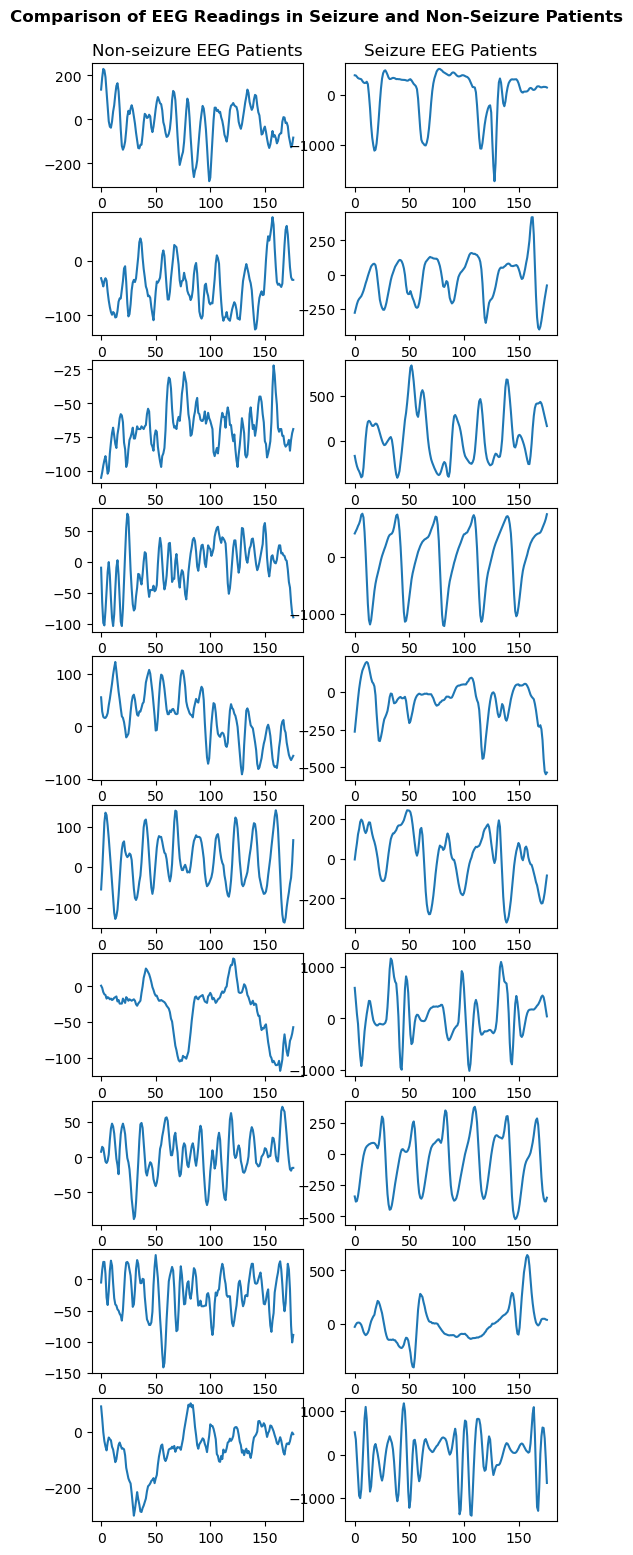

In [24]:
# subset df to create one df for seizure and one def for non-seizure
df_y0 = df[df['y'] == 0]
df_y1 = df[df['y'] == 1]

# extract X1 to X178 EEG values
y0_arr = df_y0.iloc[:,1:178].values
y1_arr = df_y1.iloc[:,1:178].values

# plot some observations
plt.figure(figsize=(6,18)) # size in inches

# left side of fig
plt.subplot(10, 2, 1)
plt.title('Non-seizure EEG Patients')
plt.plot(y0_arr[0])
plt.subplot(10, 2, 3)
plt.plot(y0_arr[1])
plt.subplot(10, 2, 5)
plt.plot(y0_arr[2])
plt.subplot(10, 2, 7)
plt.plot(y0_arr[3])
plt.subplot(10, 2, 9)
plt.plot(y0_arr[4])
plt.subplot(10, 2, 11)
plt.plot(y0_arr[5])
plt.subplot(10, 2, 13)
plt.plot(y0_arr[6])
plt.subplot(10, 2, 15)
plt.plot(y0_arr[7])
plt.subplot(10, 2, 17)
plt.plot(y0_arr[8])
plt.subplot(10, 2, 19)
plt.plot(y0_arr[9])

#right side of fig
plt.subplot(10, 2, 2)
plt.title('Seizure EEG Patients')
plt.plot(y1_arr[0])
plt.subplot(10, 2, 4)
plt.plot(y1_arr[1])
plt.subplot(10, 2, 6)
plt.plot(y1_arr[2])
plt.subplot(10, 2, 8)
plt.plot(y1_arr[3])
plt.subplot(10, 2, 10)
plt.plot(y1_arr[4])
plt.subplot(10, 2, 12)
plt.plot(y1_arr[5])
plt.subplot(10, 2, 14)
plt.plot(y1_arr[6])
plt.subplot(10, 2, 16)
plt.plot(y1_arr[7])
plt.subplot(10, 2, 18)
plt.plot(y1_arr[8])
plt.subplot(10, 2, 20)
plt.plot(y1_arr[9])

plt.suptitle('Comparison of EEG Readings in Seizure and Non-Seizure Patients', fontweight='bold', y=0.95)

#plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.show()


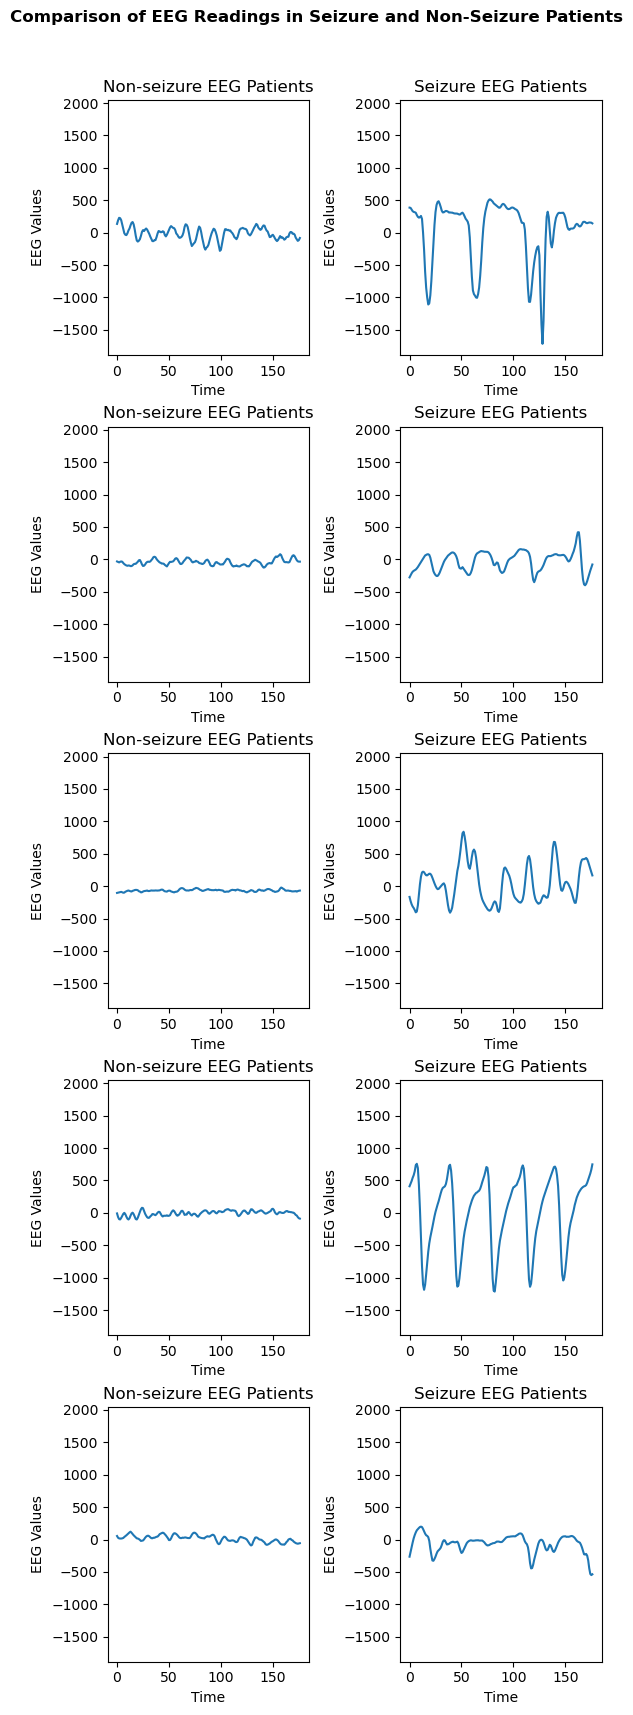

In [25]:
# subset df to create one df for seizure and one df for non-seizure
df_y0 = df[df['y'] == 0]
df_y1 = df[df['y'] == 1]

# extract X1 to X178 EEG values
y0_arr = df_y0.iloc[:, 1:178].values
y1_arr = df_y1.iloc[:, 1:178].values

# plot
plt.figure(figsize=(6, 18))  # size in inches

num_plots = 10
num_columns = 2
num_rows = (num_plots + 1) // 2  # Add 1 to handle odd number of plots

y_min = np.min(np.concatenate((y0_arr, y1_arr)))
y_max = np.max(np.concatenate((y0_arr, y1_arr)))

for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i + 1)

    if i % 2 == 0:
        plt.title('Non-seizure EEG Patients')
        data = y0_arr[i // 2]
    else:
        plt.title('Seizure EEG Patients')
        data = y1_arr[(i - 1) // 2]

    plt.plot(data)
    plt.xlabel('Time')
    plt.ylabel('EEG Values')
    plt.ylim(y_min, y_max)

plt.tight_layout()
plt.suptitle('Comparison of EEG Readings in Seizure and Non-Seizure Patients', fontweight='bold', y=0.95)
plt.subplots_adjust(top=0.90)

plt.show()


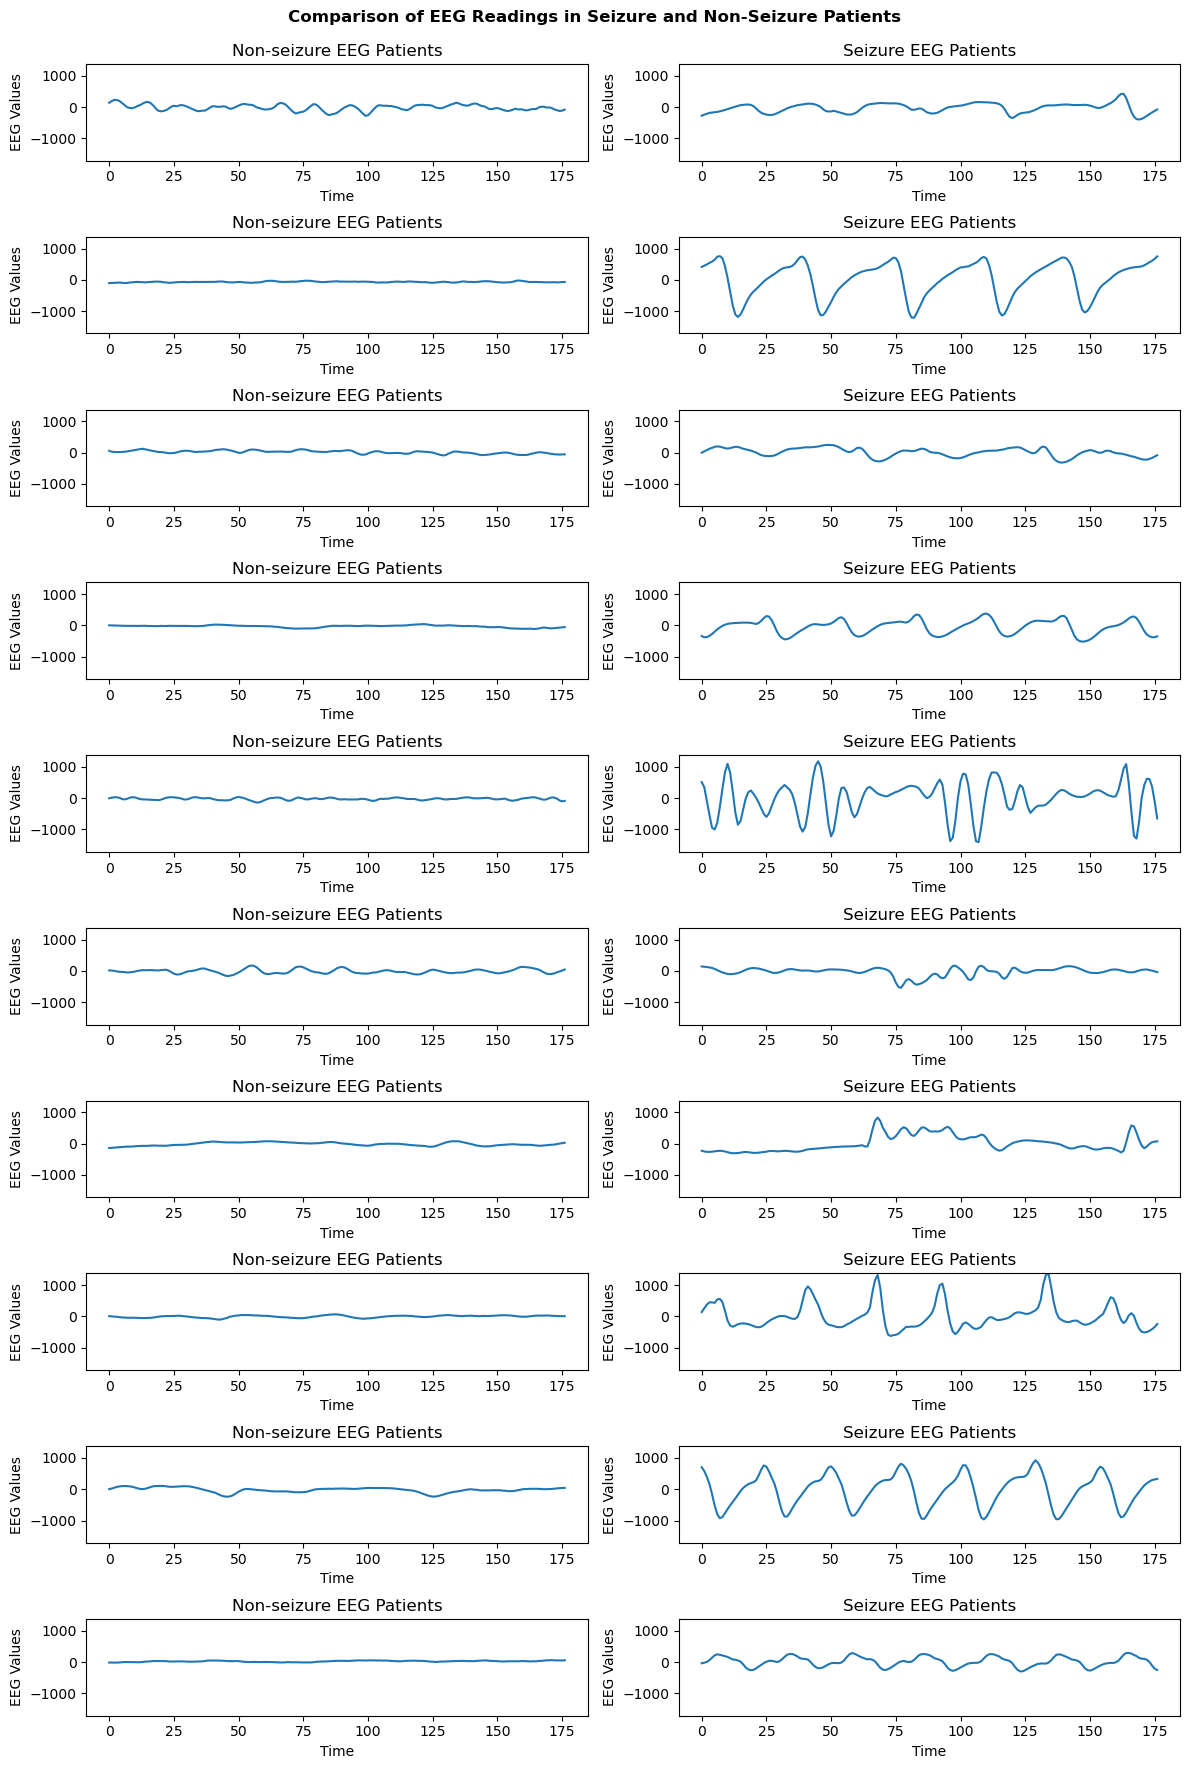

In [26]:
# subset df to create one df for seizure and one df for non-seizure
df_y0 = df[df['y'] == 0]
df_y1 = df[df['y'] == 1]

# extract X1 to X178 EEG values
y0_arr = df_y0.iloc[:, 1:178].values
y1_arr = df_y1.iloc[:, 1:178].values

# plot the first 10 pairs
plt.figure(figsize=(12,18))  # size in inches

num_plots = 20
num_columns = 2
num_rows = (num_plots + 1) // 2  # Add 1 to handle odd number of plots

# same y-axis limits for all subplots
y_min = np.min(np.concatenate((y0_arr[:num_plots], y1_arr[:num_plots])))
y_max = np.max(np.concatenate((y0_arr[:num_plots], y1_arr[:num_plots])))

for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i + 1)

    if i % 2 == 0:
        plt.title('Non-seizure EEG Patients')
        data = y0_arr[i]
    else:
        plt.title('Seizure EEG Patients')
        data = y1_arr[i]

    plt.plot(data)
    plt.xlabel('Time')
    plt.ylabel('EEG Values')
    plt.ylim(y_min, y_max)

plt.tight_layout()
plt.suptitle('Comparison of EEG Readings in Seizure and Non-Seizure Patients', fontweight='bold')
plt.subplots_adjust(top=0.95)

plt.show()


To investigate further, we decided to create lineplots for 'Identifier_X' column. The numeric value following the 'X' corresponds to the xth second of EEG recording. We wanted to compare seizure vs non-seizure patients at each second.

In [27]:
def getSeconds(identifier):
  return int(identifier[1:3])

df['Seconds'] = df['Identifier_X'].apply(getSeconds) # extract seconds from identifer column

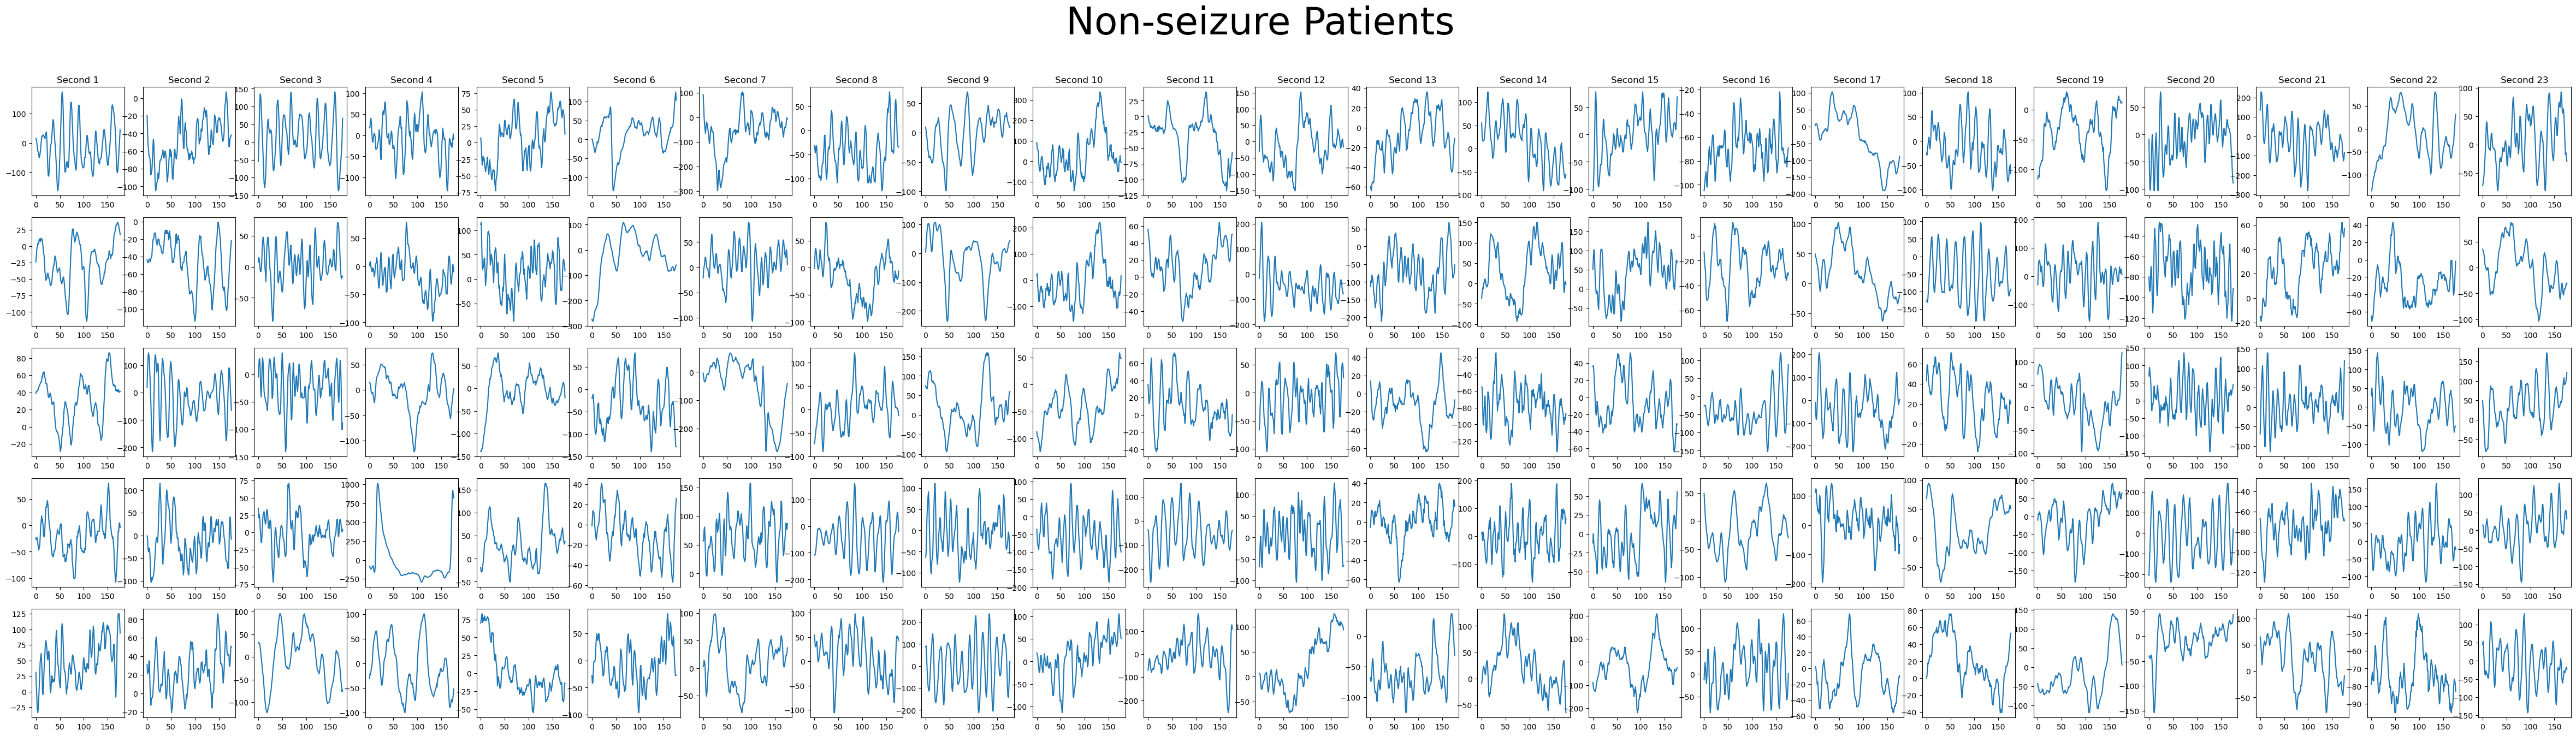

In [28]:
fig, axes = plt.subplots(5, 23, figsize=(60, 15))

fig.suptitle('Non-seizure Patients', fontsize = 50)

for j in range(1,24):
    df0_sec = df[(df['Seconds'] == j)  & (df['y'] == 0)] # non-seizure
    y0_sec = df0_sec.iloc[:,1:178].values # array

    for i in range(1, 6):
        ax = axes[i-1][j-1]
        ax.plot(y0_sec[i-1])
        if i == 1:
            ax.set_title(f'Second {j}')

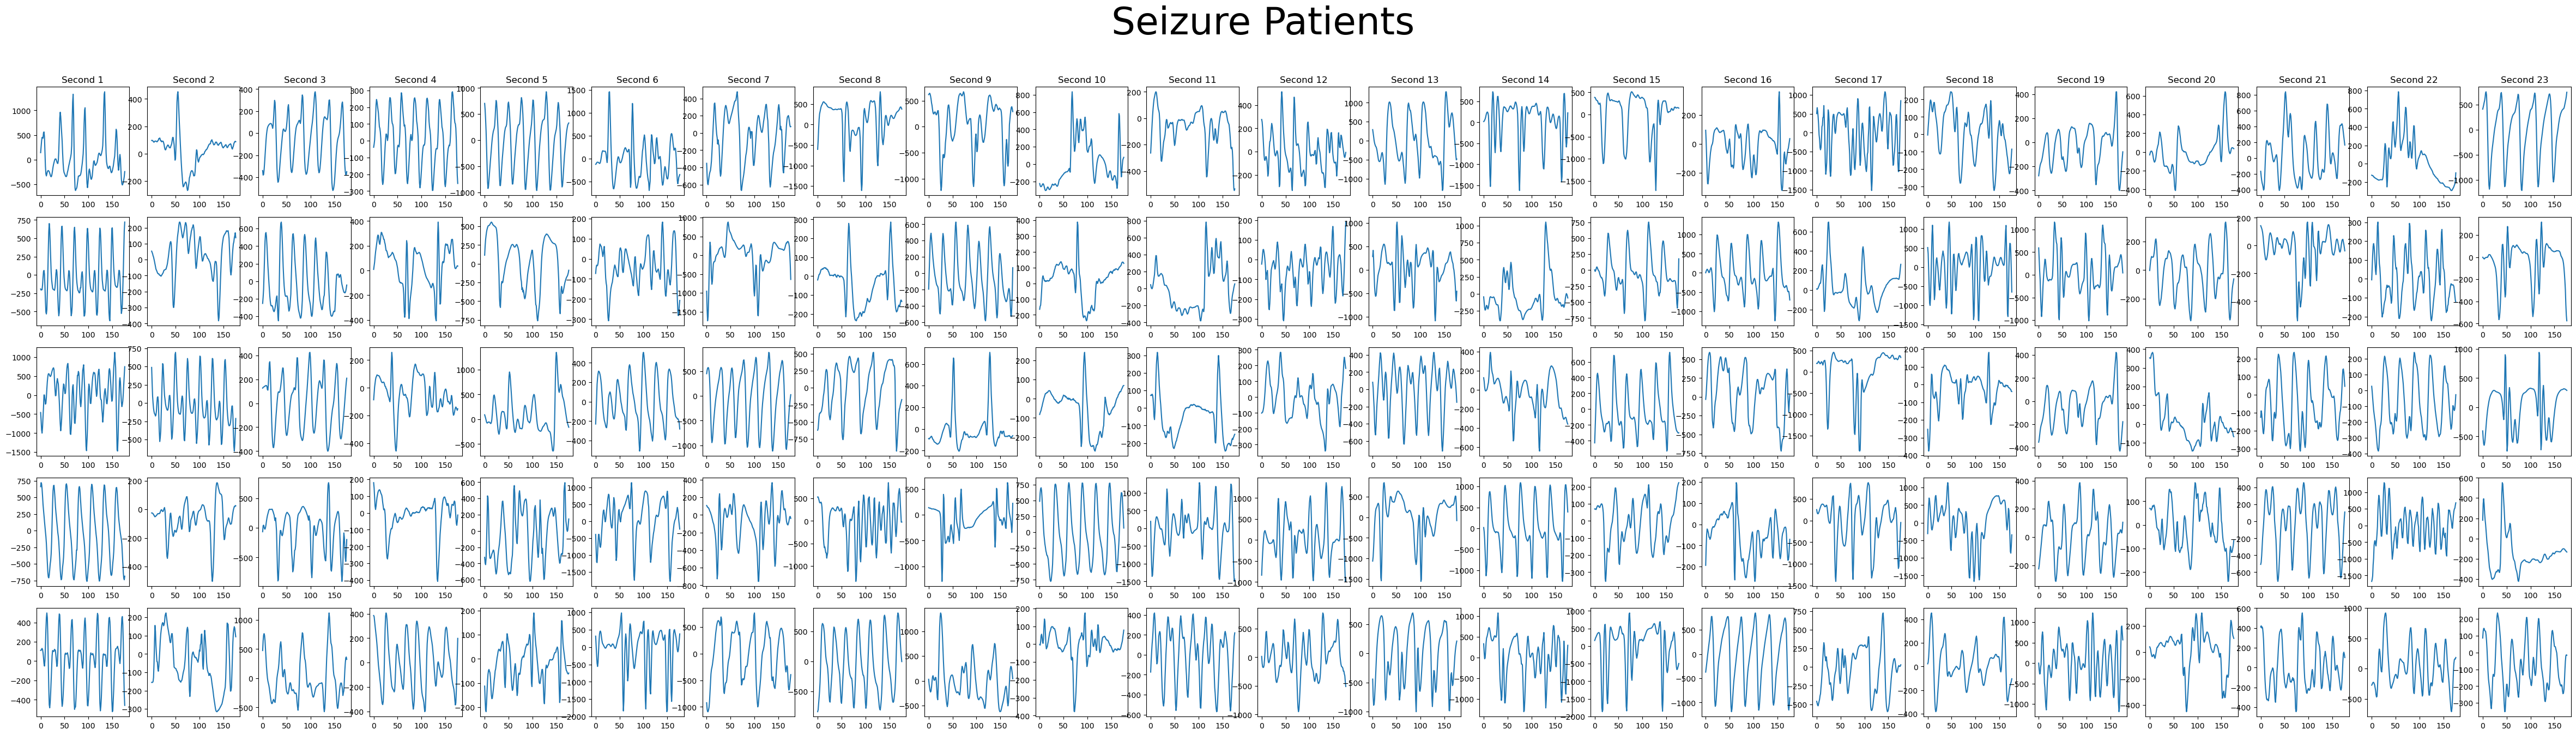

In [29]:
fig, axes = plt.subplots(5, 23, figsize=(60, 15))

fig.suptitle('Seizure Patients', fontsize = 50)

for j in range(1,24):
    df1_sec = df[(df['Seconds'] == j)  & (df['y'] == 1)] # seizure
    y1_sec = df1_sec.iloc[:,1:178].values # array

    for i in range(1, 6):
        ax = axes[i-1][j-1]
        ax.plot(y1_sec[i-1])
        if i == 1:
            ax.set_title(f'Second {j}')

According to Ahmandi et al's paper 'EEG-based classification of epilepsy and PNES: EEG microstate and functional brain network features', as well as with Dr. Atkinson (WSU School of Medicine)'s work "How to Interpret an EEG and its Report", as an observation that the first few visualizations of EEGs readings in seizure and non-seizure patients. From an observational perspective, we believe that the signal nodes in the seizure patient's EEG's show greater variance in their signal nodes compared to the non-seizure counterparts.


References:
1. Ahmadi, Negar, et al. “EEG-Based Classification of Epilepsy and PNES: EEG Microstate and Functional Brain Network Features.” Brain Informatics, U.S. National Library of Medicine, 29 May 2020, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7260313/.

2. Atkinson, Marie. “How to Interpret and EEG and Its Report - Neurology.” Https://Neurology.med.wayne.edu/Pdfs/how_to_interpret_and_eeg_and_its_report.Pdf, 19 July 2010, https://neurology.med.wayne.edu/pdfs/how_to_interpret_and_eeg_and_its_report.pdf.

Statistic Comparisons for seizure vs non-seizure patients

In [30]:
#Summary statistics of non-seizure patients
df[df.get('y')==0].describe().T

count       mean        std    min   25%   50%   75%     max
X1       9200.0  -8.992609  70.455286 -566.0 -44.0  -7.0  26.0  1726.0
X2       9200.0  -8.877174  70.560110 -609.0 -44.0  -7.0  27.0  1713.0
X3       9200.0  -8.910435  70.372582 -594.0 -45.0  -7.0  28.0  1697.0
X4       9200.0  -8.969783  70.030409 -549.0 -45.0  -8.0  27.0  1612.0
X5       9200.0  -9.085326  69.377958 -603.0 -45.0  -8.0  27.0  1437.0
...         ...        ...        ...    ...   ...   ...   ...     ...
X176     9200.0  -9.620435  70.353607 -594.0 -46.0  -8.0  27.0  2047.0
X177     9200.0  -9.395435  70.934300 -563.0 -45.0  -9.0  27.0  2047.0
X178     9200.0  -9.240435  71.185850 -559.0 -45.0  -8.0  27.0  1915.0
y        9200.0   0.000000   0.000000    0.0   0.0   0.0   0.0     0.0
Seconds  9200.0  12.000000   6.633610    1.0   6.0  12.0  18.0    23.0

[180 rows x 8 columns]

In [31]:
#Summary statistics of seizure patients
df[df.get('y')==1].describe().T

count       mean         std     min     25%   50%     75%     max
X1       2300.0 -21.936522  342.361939 -1839.0 -193.25 -16.0  159.00  1314.0
X2       2300.0 -19.049130  343.398782 -1838.0 -191.25 -18.0  168.25  1356.0
X3       2300.0 -15.293913  337.489643 -1835.0 -187.00 -12.5  169.25  1274.0
X4       2300.0  -9.836087  332.354833 -1845.0 -184.00  -6.0  166.25  1226.0
X5       2300.0  -3.707391  332.211163 -1791.0 -174.25 -12.0  170.00  1518.0
...         ...        ...         ...     ...     ...   ...     ...     ...
X176     2300.0 -25.043913  335.747017 -1781.0 -192.00 -18.0  150.00  1371.0
X177     2300.0 -24.548261  335.244512 -1727.0 -190.25 -21.5  151.25  1445.0
X178     2300.0 -24.016522  339.819309 -1829.0 -189.00 -23.0  157.25  1380.0
y        2300.0   1.000000    0.000000     1.0    1.00   1.0    1.00     1.0
Seconds  2300.0  12.000000    6.634692     1.0    6.00  12.0   18.00    23.0

[180 rows x 8 columns]

# ML Model Preprocessing

In [32]:
X = df.iloc[:,1:179] # df only includes X1-X178, other columns dropped
y = df.y # dependent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) # 80/20 train:test split

# Normalize data using z-scores
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


# Logistic Regression

In [33]:
#Create a Logistic Regression Classifier
logisticRegr_clf = LogisticRegression(solver='liblinear')

#Fit Classifier on training data
logisticRegr_clf.fit(X_train, y_train)

#Predictions on the testing data
LR_predictions = logisticRegr_clf.predict(X_test)

#Logistic Regression Accuracy
score = logisticRegr_clf.score(X_test, y_test)
print(score)

0.8178260869565217


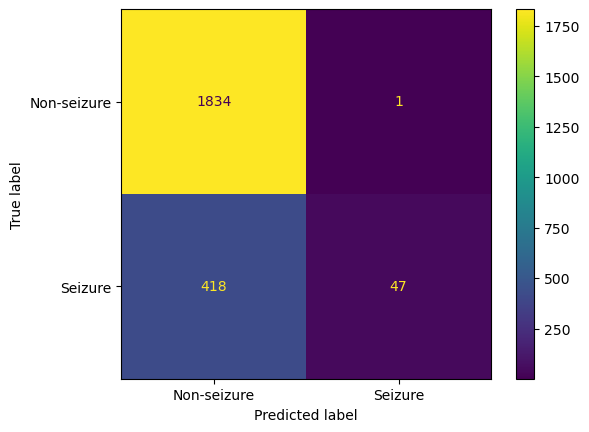

In [34]:
logisticRegr_cm = confusion_matrix(y_test, LR_predictions) # create confusion matrix
logisticRegr_display = ConfusionMatrixDisplay(confusion_matrix = logisticRegr_cm, display_labels = ['Non-seizure', 'Seizure']) # create display
logisticRegr_display.plot() # TN = top-left, FN = bottom-left (type 2 error), TP = bottom-right, FP = top-right (type 1 error)

# Gaussian Naive Bayesian

### About
Gaussian Naive Bayesian, also known as GaussianNB, is a probabilistic classification algorithm based on Bayes' theorem, which assumes independence between the features in the dataset. The algorithm is called "naive" because it makes the simplifying assumption that the features are independent of each other, which may not always be true in real-world datasets. GaussianNB is particularly well-suited for datasets with continuous features, as it models each feature using a Gaussian distribution. In classification, GaussianNB calculates the probability that a given data point belongs to a particular class based on the probability of the features, assuming that the features are normally distributed. This probability is then used to make a classification decision. GaussianNB is relatively fast and requires relatively small amounts of training data, making it a popular choice for classification problems with high-dimensional datasets.

### Application
. GNB assumes that the features of the dataset are independent and normally distributed, which makes it particularly well-suited for modeling EEG data. In a seizure prediction project, the algorithm can be trained on a dataset of EEG recordings, with each recording labeled as either "seizure" or "non-seizure." The algorithm then uses the probability distribution of the features to calculate the probability that a given recording belongs to each class. By setting a threshold for the probability, the algorithm can make a prediction on whether the next recording is likely to be a seizure or not. GNB can be a powerful tool in seizure prediction projects, as it can analyze large amounts of EEG data quickly and accurately, potentially improving patient outcomes by allowing for earlier and more accurate diagnoses.

### Package
The Gaussian Naive Bayes classifier is a machine learning algorithm that is used for classification tasks. Specifically, it calculates the probability of a given data point belonging to a certain class based on the probability of the features in the dataset, assuming that the features are normally distributed and independent of each other.

In order to make a classification decision, the algorithm first calculates the probability that a data point belongs to each class based on the features, using Bayes' theorem. It then assigns the data point to the class with the highest probability.

The "naive" assumption in the algorithm is that the features are independent of each other, which may not always be true in real-world datasets. Despite this simplifying assumption, the Gaussian Naive Bayes classifier can perform well on a wide variety of classification tasks and is particularly well-suited for datasets with continuous features.

### Parameters
Prior probabilities: The prior probabilities represent the probability of each class occurring in the dataset before any evidence is taken into account. These probabilities can be estimated from the training data or set manually.

Class conditional probabilities: The class conditional probabilities represent the probability of each feature given each class. In Gaussian Naive Bayes, these probabilities are modeled using a Gaussian distribution with mean and variance estimated from the training data for each class and feature.

In [35]:
# Create a Gaussian Naive Bayes classifier
naiveBayes_clf = GaussianNB()

# Fit classifier on the training data
naiveBayes_clf.fit(X_train, y_train)

# Predictions on the testing data
naiveBayes_pred = naiveBayes_clf.predict(X_test)

# Naive Bayesian training score
train_DT_nB= naiveBayes_clf.score(X_train,y_train)
print("The accuracy rate for the training dataset of Naive Bayesian Classifier is :", round(train_DT_nB,5))

# Naive Bayesian test score
test_DT_nB= naiveBayes_clf.score(X_test,y_test)
print("The accuracy rate for the testing dataset of Naive Bayesian Classifier is :", round(test_DT_nB,5))

The accuracy rate for the training dataset of Naive Bayesian Classifier is : 0.95598
The accuracy rate for the testing dataset of Naive Bayesian Classifier is : 0.96391


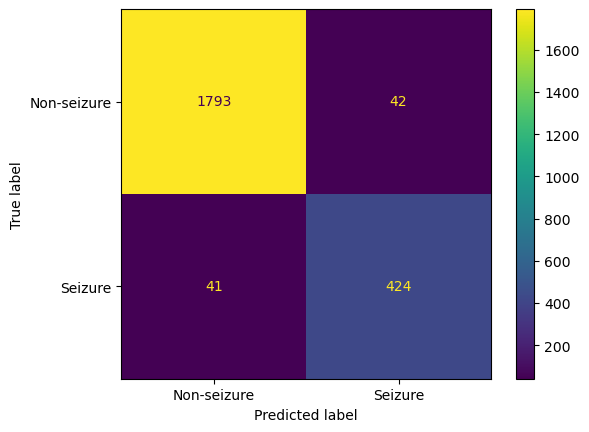

In [36]:
naiveBayes_cm = confusion_matrix(y_test, naiveBayes_pred) # create confusion matrix
naiveBayes_display = ConfusionMatrixDisplay(confusion_matrix = naiveBayes_cm, display_labels = ['Non-seizure', 'Seizure']) # create display
naiveBayes_display.plot() # TN = top-left, FN = bottom-left (type 2 error), TP = bottom-right, FP = top-right (type 1 error)

# What do the results mean to us (pending, since notebook needs to be reorganized)

#Sources
1. https://scikit-learn.org/stable/modules/naive_bayes.html

# Decision Tree
A decision tree (DT) is a supervised machine learning algorithm used for both classification and regression, it uses a set of rules to make a decision similarly to how a human would make decisions. The nodes of a DT are decision nodes based on a particular feature in the dataset, each node branches into two or more outcomes based on the decision node. DTs can be considered a greedy top-down algorithm. At each node, we want to either minimize the Gini Index or maximize Information Gain.

DTs can use Gini Index or Entropy+Information Gain to measure the impurity of a split at each node.
- ***Gini Index:*** measures the probability of a random instance (datapoint) being misclassified based on according to distribution of labels in the subset. Gini Index can range from 0 to 1; a lower Gini Index indicates a lower likelihood of misclassification, making it a better measure of impurity.
- ***Entropy:*** measures the degree of randomness at a particular node. Entropy can range from 0 to 0.5; a smaller Entropy indicates the subset of datapoints have higher puurity/homogeneity.
- ***Information Gain:*** the difference between the entropy of the parent node and the average of the entropies of its child nodes.

We decided on a DT classifier that uses the Gini Index measure because:
1. DTs are nonparametric, so it works well with our data since it does not follow a specific distribution
2. Gini Index DTs are often used to classify target variables that are binary, which aligns with our goal of classifying seizure vs non-seizure patients
3. Gini Index DTs are computationally more efficient than Entropy DTs

## OLD Decision Tree

In [37]:
# Create Decision Tree Classifier
decisionTree_clf = DecisionTreeClassifier() # default criterion: gini
# Fit training data
decisionTree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.6030509807232926, 0.9901960784313726, 'x[158] <= 0.901\ngini = 0.319\nsamples = 9200\nvalue = [7365, 1835]'),
 Text(0.3480568486646303, 0.9705882352941176, 'x[158] <= -1.03\ngini = 0.255\nsamples = 8570\nvalue = [7287, 1283]'),
 Text(0.10546365914786968, 0.9509803921568627, 'x[174] <= 0.172\ngini = 0.207\nsamples = 513\nvalue = [60, 453]'),
 Text(0.06335839598997493, 0.9313725490196079, 'x[143] <= 0.403\ngini = 0.358\nsamples = 244\nvalue = [57, 187]'),
 Text(0.03368421052631579, 0.9117647058823529, 'x[7] <= -0.918\ngini = 0.46\nsamples = 145\nvalue = [52, 93]'),
 Text(0.020852130325814535, 0.8921568627450981, 'x[165] <= -2.424\ngini = 0.05\nsamples = 39\nvalue = [1, 38]'),
 Text(0.01443609022556391, 0.8725490196078431, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.027268170426065164, 0.8725490196078431, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.046516290726817046, 0.8921568627450981, 'x[38] <= 0.864\ngini = 0.499\nsamples = 106\nvalue = [51, 55]'),
 Text(0.04

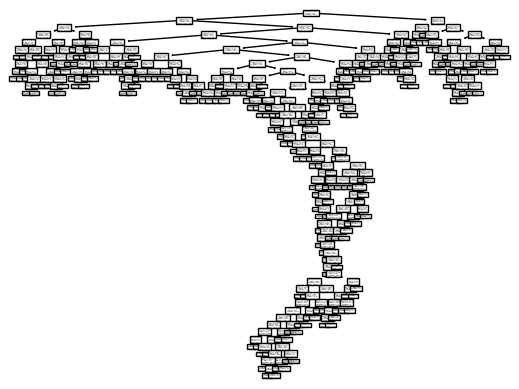

In [38]:
tree.plot_tree(decisionTree_clf) #plot decision tree

In [39]:
# Decision Tree train score
train_DT =  decisionTree_clf.score(X_train, y_train)
print("The accuracy rate of the Decision Tree Classifier on the training dataset is:", round(train_DT, 4))

# Deicsion Tree test score
test_DT =  decisionTree_clf.score(X_test, y_test)
print("The accuracy rate of the Decision Tree Classifier on the testing dataset is:", round(test_DT,4))

The accuracy rate of the Decision Tree Classifier on the training dataset is: 1.0
The accuracy rate of the Decision Tree Classifier on the testing dataset is: 0.9413


These DT classifier accuracy results show that the model performs better on the training data set than the testing dataset. Although the accuracy on the training dataset is perfect at 1.0, this may suggest the DT classifier is overfitting to the trianing data and will not perform well on unseen/new data. Hyperparameter tuning of the DT classifier may be needed to prevent overfitting.

https://scikit-learn.org/stable/modules/tree.html#tree
https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c

## Decision Tree (Hyperparameter-tuned)

We found that max_depth=36 was the best value to limit the decision tree's depth to prevent overfitting to data without decreasing accuracy rate on testing data. Similarly, min_samples_split=10 means a minimum of 10 samples are required to split an internal node. This reduces the number of times the tree splits and also prevents overfitting.

In [40]:
dt_clf2 = DecisionTreeClassifier(max_depth=36, min_samples_split=10) # default criterion: gini

# Fit training data
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=36, min_samples_split=10)

[Text(0.6053352452531645, 0.9864864864864865, 'x[158] <= 0.901\ngini = 0.319\nsamples = 9200\nvalue = [7365, 1835]'),
 Text(0.3504173259493671, 0.9594594594594594, 'x[158] <= -1.03\ngini = 0.255\nsamples = 8570\nvalue = [7287, 1283]'),
 Text(0.10734177215189873, 0.9324324324324325, 'x[174] <= 0.172\ngini = 0.207\nsamples = 513\nvalue = [60, 453]'),
 Text(0.06886075949367089, 0.9054054054054054, 'x[143] <= 0.403\ngini = 0.358\nsamples = 244\nvalue = [57, 187]'),
 Text(0.03240506329113924, 0.8783783783783784, 'x[7] <= -0.918\ngini = 0.46\nsamples = 145\nvalue = [52, 93]'),
 Text(0.01620253164556962, 0.8513513513513513, 'x[165] <= -2.424\ngini = 0.05\nsamples = 39\nvalue = [1, 38]'),
 Text(0.00810126582278481, 0.8243243243243243, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.02430379746835443, 0.8243243243243243, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.04860759493670886, 0.8513513513513513, 'x[38] <= 0.864\ngini = 0.499\nsamples = 106\nvalue = [51, 55]'),
 Text(0.04050

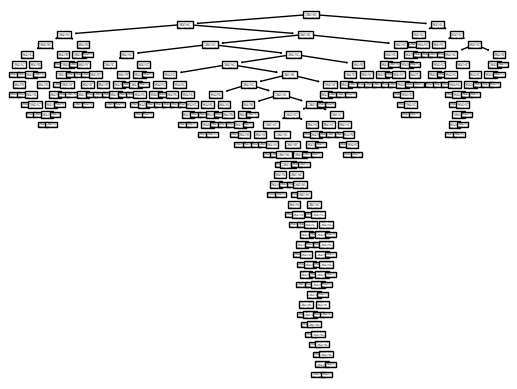

In [41]:
tree.plot_tree(dt_clf2)

In [42]:
dt_pred = dt_clf2.predict(X_test) # Predict

# Decision Tree train score
train_DT2 =  dt_clf2.score(X_train, y_train)
print("The accuracy rate of the Decision Tree Classifier (Hyperparameter tuned) on the training dataset is:", round(train_DT2, 4))

# Deicsion Tree test score
test_DT2 =  dt_clf2.score(X_test, y_test)
print("The accuracy rate of the Decision Tree Classifier (Hyperparameter tuned) on the testing dataset is:", round(test_DT2,4))

The accuracy rate of the Decision Tree Classifier (Hyperparameter tuned) on the training dataset is: 0.9913
The accuracy rate of the Decision Tree Classifier (Hyperparameter tuned) on the testing dataset is: 0.95


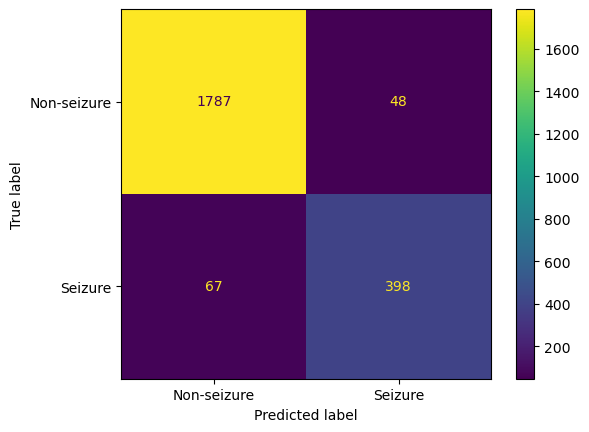

In [43]:
dt_cm = confusion_matrix(y_test, dt_pred) # create confusion matrix
dt_display = ConfusionMatrixDisplay(confusion_matrix = dt_cm, display_labels = ['Non-seizure', 'Seizure']) # create display
dt_display.plot() # TN = top-left, FN = bottom-left (type 2 error), TP = bottom-right, FP = top-right (type 1 error)

# K-Means



### About
K-means is a popular unsupervised clustering algorithm used in data science and machine learning to partition a dataset into k clusters based on similarity of features among data points. The algorithm works by randomly initializing k cluster centroids, assigning each data point to the closest centroid, updating the centroid locations based on the mean of all data points assigned to that centroid, and repeating the process until convergence is achieved.

K-means is a simple and scalable algorithm that can handle large datasets and is often used in exploratory data analysis to identify patterns and structures in the data. However, it has some limitations, such as being sensitive to initial centroid placement, requiring the user to specify the number of clusters, and assuming that clusters are of similar size and shape.

### Application
In the project of trying to predict seizures from the Epileptic Seizure Recognition dataset, k-means clustering can be used as a preprocessing step to identify distinct groups or clusters of data points that share similar feature values. This can be useful in identifying patterns and relationships in the data that may be relevant to predicting seizures.

For example, we can apply k-means clustering to group the EEG signal measurements into distinct clusters based on their feature values such as frequency, amplitude, and time domain properties. This can help to identify different types of EEG signals that are associated with different stages of seizures, and potentially improve the accuracy of seizure prediction models.

Additionally, k-means clustering can be used to identify outliers or anomalies in the data that may be indicative of seizure activity. These outliers can then be further analyzed to determine if they are indeed seizure-related or due to other factors such as data artifacts or noise.

Overall, k-means clustering can be a useful tool in exploratory data analysis and preprocessing for seizure prediction models, by identifying patterns and relationships in the data and grouping similar data points together.

### Package
The KMeans package is a part of the scikit-learn library in Python, which provides an implementation of the k-means clustering algorithm. The KMeans package can be used to cluster a dataset into k clusters based on the similarity of the feature values among data points.

The package allows the user to specify the number of clusters, the initialization method for the cluster centroids, and the maximum number of iterations for the algorithm. It also provides a method for predicting the cluster labels for new data points based on the learned model.

In addition to the basic k-means algorithm, scikit-learn's KMeans package provides several variations of the algorithm, including mini-batch k-means, spherical k-means, and affinity propagation. It also provides methods for evaluating the quality of the clustering results using metrics such as silhouette score and inertia.

Overall, the KMeans package is a powerful tool for clustering and exploratory data analysis in machine learning and data science, and can be used in a wide range of applications to identify patterns and relationships in data.

### Parameters
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

"Predict the closest cluster each sample in X belongs to.

In the vector quantization literature, cluster_centers_ is called the code book and each value returned by predict is the index of the closest code in the code book.

Parameters:
X{array-like, sparse matrix} of shape (n_samples, n_features)
New data to predict.

sample_weightarray-like of shape (n_samples,), default=None

The weights for each observation in X. If None, all observations are assigned equal weight."

/Users/garrettlam/opt/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


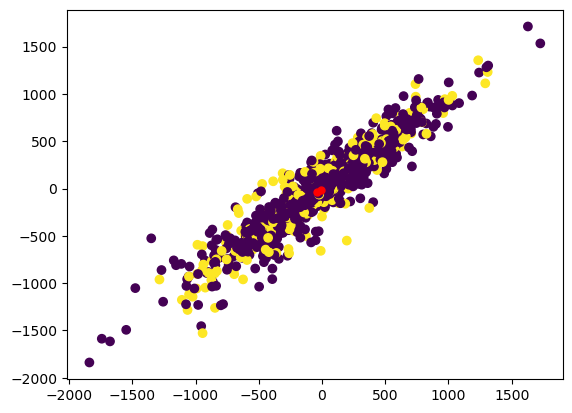

The Silhouette score for k-means clustering: 0.61


In [44]:
# Uses the Kmeans package
kmeans = KMeans(n_clusters=2, random_state=0) #the number of clusters is set to 2 because we wanted to see if there was a clear separation between the two classes of seizure and non-seizure data point

# Fit the k-means model to the data
kmeans.fit(X)

# Get the cluster assignments for each data point
kmeans_pred = kmeans.predict(X)

# Get the coordinates of the centroids for each cluster
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_pred)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=100, color='red') #the dot is the centroid of the clusters
plt.show()

# Silhoutte score (can't use accuracy scores, this is used to measure the quality of the clustering solution which is basd on distance between each data point and the assigned cluster)
KM_silhoutte_score = silhouette_score(X, kmeans.labels_)

print("The Silhouette score for k-means clustering: {:.2f}".format(KM_silhoutte_score))

### confusion matrix not possible with k-means

# k-Nearest Neighbor (k-NN)

In [45]:
# Create a K-nearest neighbor classifier
kNN_clf = KNeighborsClassifier(n_neighbors=3)

# Fit classifier on the training data
kNN_clf.fit(X_train, y_train)

# Predictions on the testing data
kNN_pred = kNN_clf.predict(X_test)

# Naive Bayesian training score
train_DT_kNN= kNN_clf.score(X_train,y_train)
print("The accuracy rate for the training dataset of Naive Bayesian Classifier is :", round(train_DT_kNN,5))

# Naive Bayesian test score
test_DT_kNN= kNN_clf.score(X_test,y_test)
print("The accuracy rate for the testing dataset of Naive Bayesian Classifier is :", round(test_DT_kNN,5))

# The difference
print("The difference between the accuracy score between the training and test dataset is", round(train_DT_kNN-test_DT_kNN,5))

The accuracy rate for the training dataset of Naive Bayesian Classifier is : 0.95772
The accuracy rate for the testing dataset of Naive Bayesian Classifier is : 0.93217
The difference between the accuracy score between the training and test dataset is 0.02554


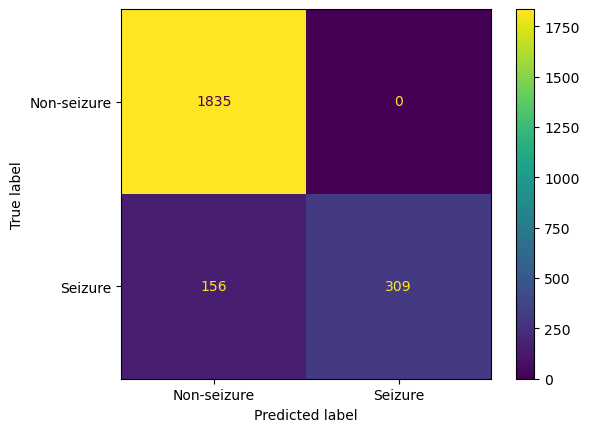

In [46]:
kNN_cm = confusion_matrix(y_test, kNN_pred) # create confusion matrix
kNN_display = ConfusionMatrixDisplay(confusion_matrix = kNN_cm, display_labels = ['Non-seizure', 'Seizure']) # create display
kNN_display.plot() # TN = top-left, FN = bottom-left (type 2 error), TP = bottom-right, FP = top-right (type 1 error)

# Support Vector Machine (SVM)

SVMs are a set of supervised machine learning algorithms used for classficiation and regression. Support Vector Classifier (SVC) is an implementation of SVMs specifically used for classification problems. SVCs aim to find the optimal hyperplane that separates the datapoints into two classes with the maximum margin.
- ***Margin:*** the distance between the hyperplane and the closest data points from each class.

We decided to use a SVC because:
- Our dataset has a large number of features (178 predictors) and SVCs can handle datasets with high-dimensional spaces.
- Our target variable is binary (seizure or non-seizure), so no additional transformations are needed to train SVC

In [47]:
from sklearn import svm
# Creating Support Vector Classifier
svc_clf_linear = svm.SVC(kernel = 'linear')
svc_clf_poly = svm.SVC(kernel = 'poly') # default degree of 3
svc_clf_rbf = svm.SVC(kernel = 'rbf') # Radial basis function
svc_clf_sig = svm.SVC(kernel = 'sigmoid')

# Fit to training data
svc_clf_linear.fit(X_train, y_train)
svc_clf_poly.fit(X_train, y_train)
svc_clf_rbf.fit(X_train, y_train)
svc_clf_sig.fit(X_train, y_train)

svc_clfs = [svc_clf_linear, svc_clf_poly, svc_clf_rbf, svc_clf_sig]
# store outputs
train_SVC_scores = []
test_SVC_scores = []

# train scores
for clf in svc_clfs:
  train_SVC_scores.append(clf.score(X_train, y_train))

# test scores
for clf in svc_clfs:
  test_SVC_scores.append(clf.score(X_test, y_test))

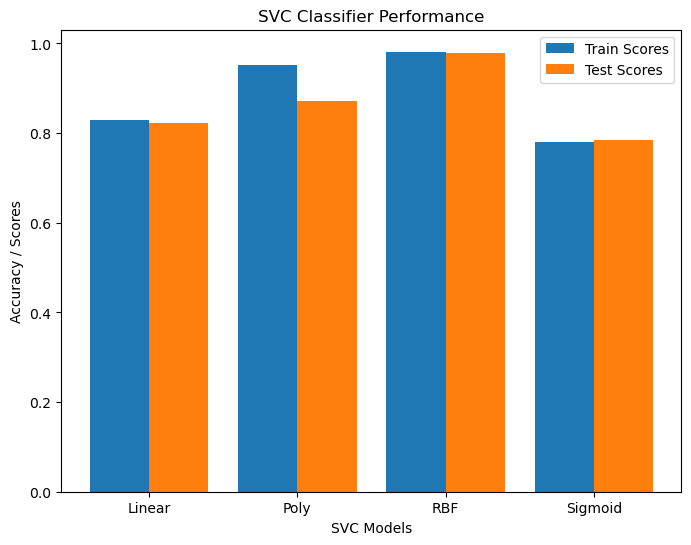

In [48]:
x_axis = np.arange(len(svc_clfs))
plt.figure(figsize=(8, 6))
plt.bar(x_axis - 0.2, train_SVC_scores, width = 0.4, label = 'Train Scores')
plt.bar(x_axis + 0.2, test_SVC_scores, width = 0.4, label = 'Test Scores')
plt.title("SVC Classifier Performance")
plt.xlabel("SVC Models")
plt.xticks(x_axis, ["Linear", "Poly", "RBF", "Sigmoid"])
plt.ylabel("Accuracy / Scores")
plt.legend()

Clearly from the graph, the best kernel to use is RBF. The SVC classifier using the RBF has the following training and testing scores:

In [49]:
print(f"The training score for Linear SVC is: {round(train_SVC_scores[0],5)}")
print(f"The testing score for Linear SVC is: {round(test_SVC_scores[0],5)}")

The training score for Linear SVC is: 0.83022
The testing score for Linear SVC is: 0.82174


In [50]:
print(f"The training score for Poly SVC is: {round(train_SVC_scores[1],5)}")
print(f"The testing score for Poly SVC is: {round(test_SVC_scores[1],5)}")

The training score for Poly SVC is: 0.9525
The testing score for Poly SVC is: 0.8713


In [51]:
print(f"The training score for RBF SVC is: {round(train_SVC_scores[2],5)}")
print(f"The testing score for RBF SVC is: {round(test_SVC_scores[2],5)}")

The training score for RBF SVC is: 0.98163
The testing score for RBF SVC is: 0.97826


In [52]:
print(f"The training score for Sigmoid SVC is: {round(train_SVC_scores[3],5)}")
print(f"The testing score for Sigmoid SVC is: {round(test_SVC_scores[3],5)}")

The training score for Sigmoid SVC is: 0.78087
The testing score for Sigmoid SVC is: 0.78565


EEG data is typically high-dimensional, highly variable, and have non-linear patterns of activity; it is difficult to model using traditional statistical learning techniques. For this reason, SVCs are well suited to model EEG data as they can handle non-linear relationships and high-dimensional feature spaces. This can be seen as we achieved an accuracy score of 97.9% on our testing data.



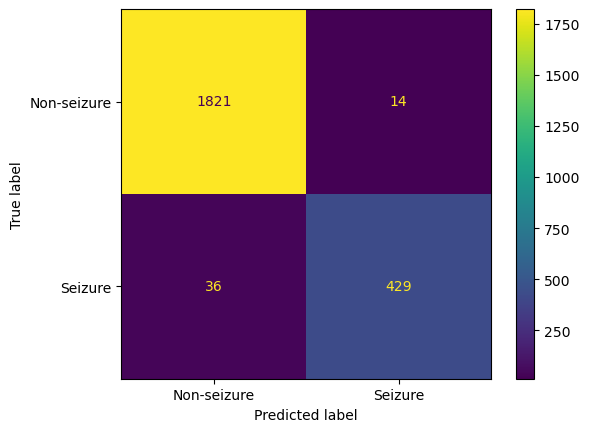

In [53]:
svc_pred = svc_clf_rbf.predict(X_test)
svc_cm = confusion_matrix(y_test, svc_pred) # create confusion matrix
svc_display = ConfusionMatrixDisplay(confusion_matrix = svc_cm, display_labels = ['Non-seizure', 'Seizure']) # create display
svc_display.plot() # TN = top-left, FN = bottom-left (type 2 error), TP = bottom-right, FP = top-right (type 1 error)

### SVC Most Weighted Features

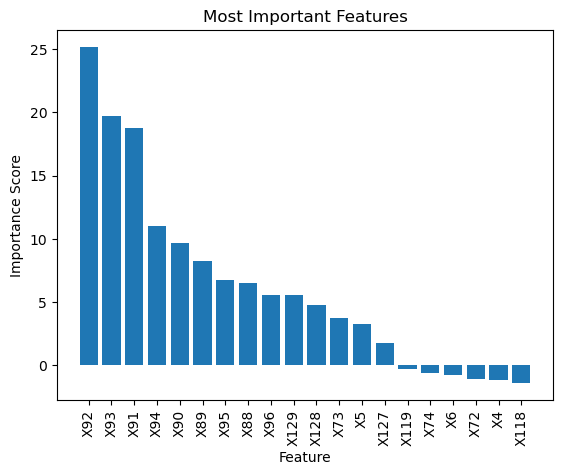

In [54]:
features = ['X' + str(i) for i in range(1, 180)]

def plot_most_important_features(model, feature_names, n_features): # specific for SVM
    sv = model.support_vectors_ # extract support vectors
    coef_abs = np.abs(model.dual_coef_) # calculate absolute value of support vector coefficients
    feature_scores = np.dot(coef_abs, sv) # calculate importance scores for each feature

    # Sort feature scores in descending order and select top N features
    top_indices = np.argsort(feature_scores)[::-1][:n_features] #
    top_scores = np.sort(feature_scores[0], kind='quicksort')[::-1][:n_features] # sort scores in descending order

    top_features = []
    for i in range(n_features):
      feature_num = top_indices[0][i]
      top_features.append(features[feature_num-1]) # -1 as lists are 0-based

    #Plot bar graph of top n features
    plt.bar(top_features, top_scores)
    plt.xticks(range(n_features), top_features, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance Score')
    plt.title('Most Important Features')
    plt.show()

plot_most_important_features(svc_clf_rbf, features, 20)

# CLF Score/ Accuracy (Summary)

In [55]:
#log - rushil
print(f'We can see the accuracy score for Logistic Regression is: {score}')

#naive bayesian- emily
print(f'We can see the accuracy score for test Naive Bayesian is: {test_DT_nB}')
print(f'We can see the accuracy score for train Naive Bayesian is: {train_DT_nB}')

#decision tree- garrett
# print("The accuracy rate of the Decision Tree Classifier on the training dataset is:", round(train_DT, 4))
# print("The accuracy rate of the Decision Tree Classifier on the training dataset is:", round(test_DT, 4))

#decision tree- retuned
print("The accuracy rate of the Decision Tree Classifier (Hyperparameter tuned) on the training dataset is:", round(train_DT2, 4))
print("The accuracy rate of the Decision Tree Classifier (Hyperparameter tuned) on the training dataset is:", round(test_DT2, 4))

#kmeans - emily
print(f'We can see the Silhoutte score for Kmeans cluster is: {KM_silhoutte_score}')

#knn- anish
print("The accuracy rate for the training dataset of Naive Bayesian Classifier is :", round(train_DT_kNN,5))
print("The accuracy rate for the training dataset of Naive Bayesian Classifier is :", round(test_DT_kNN,5))

#svc- RBF
print(f"The training score for RBF SVC is: {round(train_SVC_scores[2],5)}")
print(f"The testing score for RBF SVC is: {round(test_SVC_scores[2],5)}")


We can see the accuracy score for Logistic Regression is: 0.8178260869565217
We can see the accuracy score for test Naive Bayesian is: 0.9639130434782609
We can see the accuracy score for train Naive Bayesian is: 0.9559782608695652
The accuracy rate of the Decision Tree Classifier (Hyperparameter tuned) on the training dataset is: 0.9913
The accuracy rate of the Decision Tree Classifier (Hyperparameter tuned) on the training dataset is: 0.95
We can see the Silhoutte score for Kmeans cluster is: 0.6147128341545566
The accuracy rate for the training dataset of Naive Bayesian Classifier is : 0.95772
The accuracy rate for the training dataset of Naive Bayesian Classifier is : 0.93217
The training score for RBF SVC is: 0.98163
The testing score for RBF SVC is: 0.97826
